<a href="https://colab.research.google.com/github/srkleon/DataScience/blob/main/newswire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=15000)

2110848/2110848 [==============================] - 0s 0us/step


In [4]:
train_data.shape , test_data.shape

((8982,), (2246,))

In [6]:
train_labels.shape , test_labels.shape

((8982,), (2246,))

In [11]:
df = pd.DataFrame(train_data)
df.head()

,0
0,"[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, ..."
1,"[1, 3267, 699, 3434, 2295, 56, 2, 7511, 9, 56,..."
2,"[1, 53, 12, 284, 15, 14, 272, 26, 53, 959, 32,..."
3,"[1, 4, 686, 867, 558, 4, 37, 38, 309, 2276, 46..."
4,"[1, 8295, 111, 8, 25, 166, 40, 638, 10, 436, 2..."


In [21]:
def vectorize_data(sequences , dimensions=15000):
  results = np.zeros((len(sequences), dimensions) )
  for i,sequence in enumerate(sequences):
    results[i,sequence] = 1
  return results




In [27]:
def to_one_hot_encode(labels,dimesions=46):
  results = np.zeros((len(labels),dimesions))
  for i,label in enumerate(labels):
    results[i,label] = 1
  return results

In [29]:
x_train = vectorize_data(train_data)
x_test = vectorize_data(test_data)
y_train = to_one_hot_encode(train_labels)
y_test = to_one_hot_encode(test_labels)

In [30]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((8982, 15000), (2246, 15000), (8982, 46), (2246, 46))

In [32]:
x_remain , x_val , y_remain , y_val = train_test_split(x_train,y_train,test_size = 0.2)

In [33]:
x_remain.shape , x_val.shape , y_remain.shape , y_val.shape

((7185, 15000), (1797, 15000), (7185, 46), (1797, 46))

In [34]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(64,activation='relu',input_shape=(15000,)))
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dense(46,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                960064    
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 46)                2990      
                                                                 
Total params: 967214 (3.69 MB)
Trainable params: 967214 (3.69 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [35]:
model.compile(optimizer=keras.optimizers.RMSprop(),loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [36]:
history = model.fit(x_remain,y_remain,batch_size = 512,epochs = 20 ,validation_data=(x_val,y_val))


Epoch 1/20
15/15 [==============================] - 3s 150ms/step - loss: 2.8140 - accuracy: 0.4610 - val_loss: 1.8634 - val_accuracy: 0.6477
Epoch 2/20
15/15 [==============================] - 1s 98ms/step - loss: 1.5468 - accuracy: 0.6903 - val_loss: 1.4675 - val_accuracy: 0.6555
Epoch 3/20
15/15 [==============================] - 1s 64ms/step - loss: 1.1811 - accuracy: 0.7441 - val_loss: 1.2406 - val_accuracy: 0.7101
Epoch 4/20
15/15 [==============================] - 1s 68ms/step - loss: 0.9649 - accuracy: 0.7907 - val_loss: 1.1456 - val_accuracy: 0.7351
Epoch 5/20
15/15 [==============================] - 1s 65ms/step - loss: 0.8058 - accuracy: 0.8227 - val_loss: 1.0570 - val_accuracy: 0.7546
Epoch 6/20
15/15 [==============================] - 1s 67ms/step - loss: 0.6709 - accuracy: 0.8534 - val_loss: 1.0375 - val_accuracy: 0.7713
Epoch 7/20
15/15 [==============================] - 1s 63ms/step - loss: 0.5628 - accuracy: 0.8788 - val_loss: 0.9981 - val_accuracy: 0.7668
Epoch 8/20
1

In [39]:
hist_dict = history.history
hist_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [40]:
model.evaluate(x_test,y_test)

71/71 [==============================] - 0s 4ms/step - loss: 1.0283 - accuracy: 0.7907


[1.0283313989639282, 0.790739119052887]

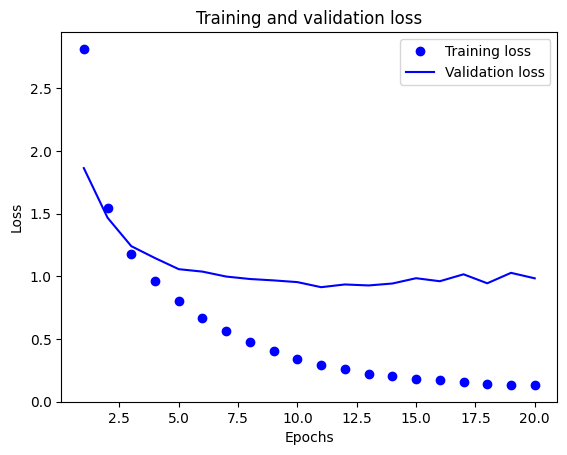

In [41]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

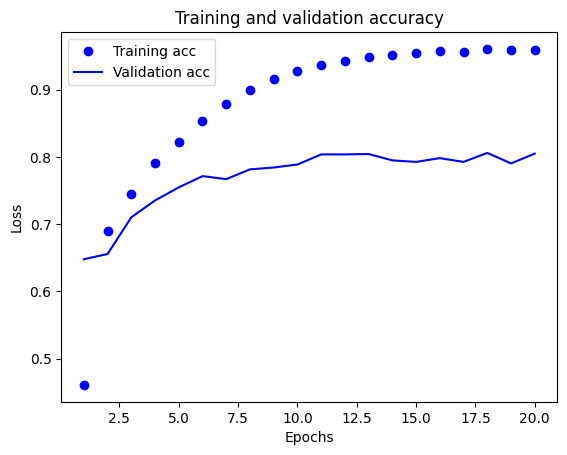

In [43]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [49]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(64,activation='relu',input_shape=(15000,)))
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dense(46,activation='softmax'))
model.summary()

model.compile(optimizer=keras.optimizers.RMSprop(),loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])
out = model.fit(x_remain,y_remain,batch_size = 512,epochs = 10 ,validation_data=(x_val,y_val))


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 64)                960064    
                                                                 
 dense_13 (Dense)            (None, 64)                4160      
                                                                 
 dense_14 (Dense)            (None, 46)                2990      
                                                                 
Total params: 967214 (3.69 MB)
Trainable params: 967214 (3.69 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
15/15 [==============================] - 2s 94ms/step - loss: 2.7916 - accuracy: 0.4830 - val_loss: 1.9326 - val_accuracy: 0.5743
Epoch 2/10
15/15 [==============================] - 1s 68ms/step - loss: 1.5853 - accuracy: 0.6604 - val_loss: 1.4481 - val_accuracy: 0.6795


In [50]:
model.evaluate(x_test,y_test)

71/71 [==============================] - 0s 4ms/step - loss: 0.9751 - accuracy: 0.7827


[0.9751420021057129, 0.7827248573303223]

In [51]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_newswire

550378/550378 [==============================] - 0s 0us/step


'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [52]:
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[1]])
decoded_newswire

'? generale de banque sa lt ? br and lt heller overseas corp of chicago have each taken 50 pct stakes in ? company sa belgo factors generale de banque said in a statement it gave no financial details of the transaction sa belgo ? turnover in 1986 was 17 5 billion belgian francs reuter 3'

In [54]:
ouput = model.predict(x_test)

71/71 [==============================] - 0s 5ms/step


In [59]:
np.argmax(ouput[0]) , np.argmax(y_test[0])

(3, 3)

In [60]:
np.argmax(ouput[1]) , np.argmax(y_test[1])

(10, 10)